###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import keyboard

In [2]:
# Sample observations from the real phenomenon
pts = 100
mu_real = -1
sigma_real = 2
# Defines initial prior
observations = norm.rvs(mu_real,sigma_real,size=pts)

In [3]:
# Building search space
mu_range = [-2.5,2.5]
sigma_range = [0.01,5]
z_range = [-0.01,0.01]
mu_values = np.linspace(mu_range[0],mu_range[1],pts)       
sigma_values = np.linspace(sigma_range[0],sigma_range[1],pts)
[mu_values,sigma_values] = np.meshgrid(mu_values,sigma_values)

(-0.9343434343434345, 1.9253535353535356)

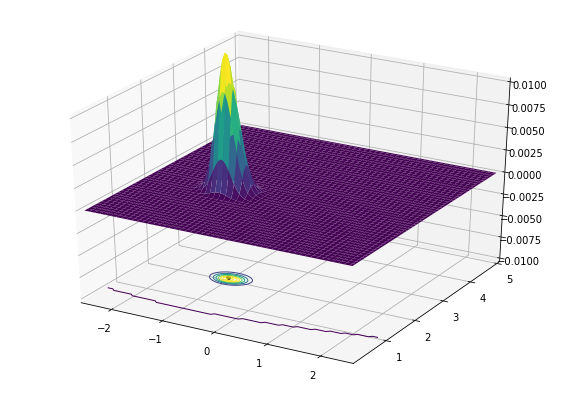

In [4]:
# Performs learning and plots progress
plot_progress = True
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Setting initial prior
prior = np.ones((pts,pts))/(pts*pts); # uniform
post = prior.copy()
estimates = []
for obs in observations:
    # plot graphical progress
    if plot_progress == True:
        ax.cla()
        ax.plot_surface(mu_values,sigma_values,post,cmap='viridis')
        ax.contour(mu_values,sigma_values,post,offset=z_range[0],vmin=0,vmax=z_range[1],linewidths=1)
        ax.scatter(mu_real,sigma_real,z_range[0],marker='.',color='k',s=60)
        ax.set_xlim(mu_range)
        ax.set_ylim(sigma_range)
        ax.set_zlim(z_range)
        display(fig)
        clear_output(wait = True)
        if keyboard.is_pressed('Esc'):
            plot_progress = False
    # build p(x|theta)
    for x in range(pts):
        for y in range(pts):
            # likelihood of observing that x for all posible mu and sigma
            mu = mu_values[x,y]
            sigma = sigma_values[x,y]
            likelihood = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(obs-mu)**2./(2*sigma**2));
            post[x,y] = likelihood * prior[x,y]
    post = post / post.sum()
    # maximum aposteriori estimator
    x,y = np.unravel_index(post.argmax(),post.shape)
    estimates.append((mu_values[x,y],sigma_values[x,y]))
    prior = post.copy()
    
# Resuls 
ax.cla()
ax.plot_surface(mu_values,sigma_values,post,cmap='viridis')
ax.contour(mu_values,sigma_values,post,offset=z_range[0],vmin=0,vmax=z_range[1],linewidths=1)
ax.scatter(mu_real,sigma_real,z_range[0],marker='.',color='k',s=60)
ax.set_xlim(mu_range)
ax.set_ylim(sigma_range)
ax.set_zlim(z_range)
estimates[-1]